In [101]:
import numpy as np
import os
# %matplotlib notebook
import matplotlib.pyplot as plt
import math
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms

In [102]:
# Original dataset angles; 1100 videos of 60 frames / angles each
all_angles = np.load("./circular_motion/all_angles.npy")
sin_angles = np.sin(all_angles)

# 110 test datapoints; 110 videos of 57 frames each = 6270 x 2 variables, 6270 x 1 ids
ids = np.load("/home/dmi/neural-state-variables/scripts/logs_circular_motion_refine-64_1/variables/ids.npy")
raw_vars = np.load("/home/dmi/neural-state-variables/scripts/logs_circular_motion_refine-64_1/variables/refine_latent.npy")
print(ids.shape)
print(raw_vars.shape)
print(all_angles.shape)

(6270,)
(6270, 2)
(1100, 60)


In [103]:
# print(ids[-100:])
# print(raw_vars[:57])


In [104]:
angles = all_angles[524]
print(angles.shape)
angles = angles[3:] # Ignore first 3 frames 
var1 = raw_vars[:57, 0]
var2 = raw_vars[:57, 1]
ids1 = ids[:57]
print(var1.shape)
print(angles.shape)
print(ids1)

(60,)
(57,)
(57,)
['524_0.png' '524_1.png' '524_2.png' '524_3.png' '524_4.png' '524_5.png'
 '524_6.png' '524_7.png' '524_8.png' '524_9.png' '524_10.png' '524_11.png'
 '524_12.png' '524_13.png' '524_14.png' '524_15.png' '524_16.png'
 '524_17.png' '524_18.png' '524_19.png' '524_20.png' '524_21.png'
 '524_22.png' '524_23.png' '524_24.png' '524_25.png' '524_26.png'
 '524_27.png' '524_28.png' '524_29.png' '524_30.png' '524_31.png'
 '524_32.png' '524_33.png' '524_34.png' '524_35.png' '524_36.png'
 '524_37.png' '524_38.png' '524_39.png' '524_40.png' '524_41.png'
 '524_42.png' '524_43.png' '524_44.png' '524_45.png' '524_46.png'
 '524_47.png' '524_48.png' '524_49.png' '524_50.png' '524_51.png'
 '524_52.png' '524_53.png' '524_54.png' '524_55.png' '524_56.png']


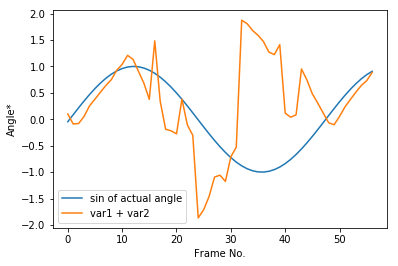

In [181]:
plt.plot(np.sin(angles), label='sin of actual angle')
# plt.plot(var1, label='predicted var 1')
# plt.plot(var2, label='predicted var 2')
# plt.plot(np.sin(var1))
# plt.plot(np.sin(var2))
var3 = var1 + var2
var4 = np.sin(var3)
plt.plot(var3, label='var1 + var2')
# plt.plot(var4, label='sin (var1 + var2)')
plt.xlabel('Frame No.')
plt.ylabel('Angle*')
plt.legend(loc="best")
plt.show()

# Neural Net
## Source: https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-multilayer-perceptron-with-pytorch-and-lightning.md

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
train_vars = []
train_angles = []
train_ids = []

curr_id = -1
for i in range(0, len(ids), 57):
    set_id = int(ids[i].split("_")[0])
    a = all_angles[set_id][3:]
    v = raw_vars[i:i+57]
    
    train_ids.append(set_id)
    train_angles.append(a)
    train_vars.append(v)

In [108]:
X = np.array(train_vars)
y = np.array(train_angles)
train_ids = np.array(train_ids)
print(train_ids.shape)
print(np.array(X).shape)
print(np.array(y).shape)
print(X[0].shape)
print(X[0][:,0].shape)

(110,)
(110, 57, 2)
(110, 57)
(57, 2)
(57,)


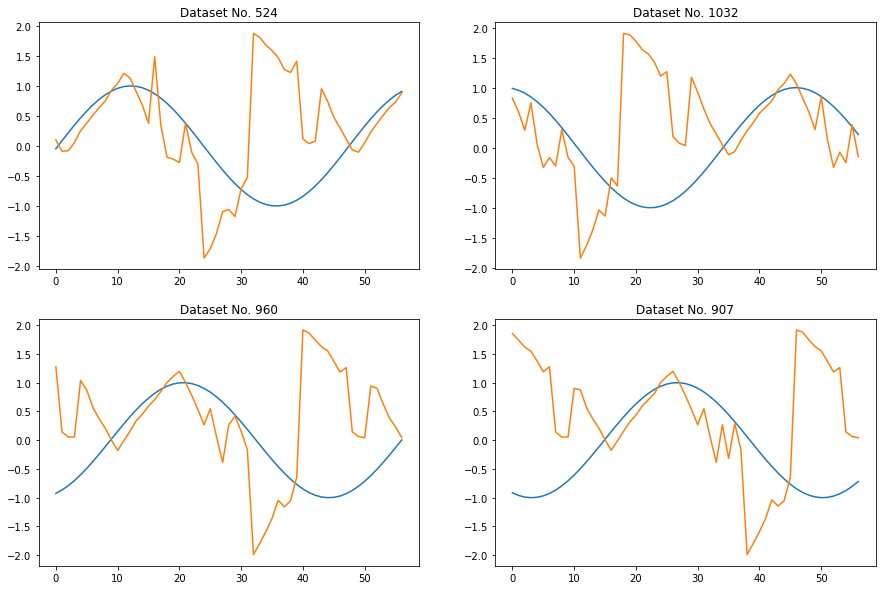

In [109]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2, figsize=(15, 10))
  
axis[0, 0].plot(np.sin(y[0]), label="sin()")
# axis[0, 0].plot(X[0][:,0], label="var1")
# axis[0, 0].plot(X[0][:,1], label="var2")
axis[0, 0].plot(X[0][:,0] + X[0][:,1], label="var1 + var2")
axis[0, 0].set_title(f"Dataset No. {train_ids[0]}")

axis[0, 1].plot(np.sin(y[1]), label="sin()")
# axis[0, 1].plot(X[1][:,0], label="var1")
# axis[0, 1].plot(X[1][:,1], label="var2")
axis[0, 1].plot(X[1][:,0] + X[1][:,1], label="var1 + var2")
axis[0, 1].set_title(f"Dataset No. {train_ids[1]}")
  
axis[1, 0].plot(np.sin(y[2]), label="sin()")
# axis[1, 0].plot(X[2][:,0], label="var1")
# axis[1, 0].plot(X[2][:,1], label="var2")
axis[1, 0].plot(X[2][:,0] + X[2][:,1], label="var1 + var2")
axis[1, 0].set_title(f"Dataset No. {train_ids[2]}")
  
axis[1, 1].plot(np.sin(y[3]), label="sin()")
# axis[1, 1].plot(X[3][:,0], label="var1")
# axis[1, 1].plot(X[3][:,1], label="var2")
axis[1, 1].plot(X[3][:,0] + X[3][:,1], label="var1 + var2")
axis[1, 1].set_title(f"Dataset No. {train_ids[3]}")
  
# Combine all the operations and display
plt.show()

In [110]:
# Split into 108 training videos and 2 test videos
y = np.sin(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print()
print(X_train[0].shape)
print(y_train[0].shape)
# print(X_train[0])

(108, 57, 2)
(108, 57)
(2, 57, 2)
(2, 57)
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([108, 57, 2])
torch.Size([108, 57])
torch.Size([2, 57, 2])
torch.Size([2, 57])

torch.Size([57, 2])
torch.Size([57])


(110, 57)
torch.Size([57, 2])
torch.Size([57])


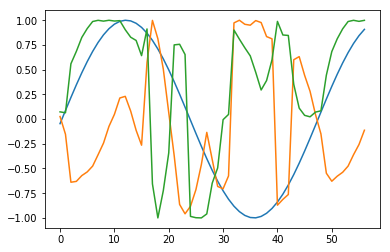

In [111]:
# x = torch.linspace(-math.pi, math.pi, 2000)
x = torch.linspace(-math.pi, math.pi, 57)
# x = torch.linspace(0, 2*math.pi, 60)
# print(x)
# y = torch.sin(x)
# print(y)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
# xx = x.unsqueeze(-1).pow(p)
xx = X_train[0]
print(y.shape)
print(xx.shape)
# print(xx)
plt.plot(y_train[0])
print(y_train[0].shape)
y = y_train[0]
plt.plot(xx)

## Training on one video (60 frames) only

In [165]:
import torch
import math


# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 30),
    nn.Tanh(),
    torch.nn.Linear(30, 60),
    nn.Tanh(),
    torch.nn.Linear(60, 1),
    torch.nn.Flatten(0, 1)
#     torch.nn.Linear(2, 30),
#     nn.Tanh(),
#     torch.nn.Linear(30, 60),
#     nn.Tanh(),
#     torch.nn.Linear(60, 30),
#     nn.Tanh(),
#     torch.nn.Linear(30, 1),
#     torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')
# loss_fn = torch.nn.L1Loss()

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# y = y_train[0]
# x = X_train[0]

avg_loss = 0

for i in range(10000):
  # Get inputs
#     X = X_train
#     y = y_train
#     x = X_train[0]
#   y_pred = y_train[i].view(57,-1)
    
    # Forward pass: compute predicted y by passing x to the model.
#     print("X:", x)
#     print("Y:", y)
    
    y_pred = model(xx)
#     print("Ypred:", y_pred)
    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    avg_loss += loss.item()
    if i % 500 == 499:
        print(f"iter {i}; loss {loss.item()}, avg loss {avg_loss}")
        avg_loss = 0

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


# linear_layer = model[0]
# print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} var1 + {linear_layer.weight[:, 1].item()} var2')

iter 499; loss 2.2542903423309326, avg loss 2556.794136762619
iter 999; loss 1.3608479499816895, avg loss 889.7629144191742
iter 1499; loss 0.7537082433700562, avg loss 502.258808195591
iter 1999; loss 0.5294986963272095, avg loss 340.08779591321945
iter 2499; loss 0.4077426791191101, avg loss 238.5485356450081
iter 2999; loss 0.29172730445861816, avg loss 181.64467629790306
iter 3499; loss 0.24006083607673645, avg loss 144.35944765806198
iter 3999; loss 0.2278847098350525, avg loss 119.6903807669878
iter 4499; loss 0.16348913311958313, avg loss 100.05084420740604
iter 4999; loss 0.1494968831539154, avg loss 87.83825343847275
iter 5499; loss 0.1388094127178192, avg loss 76.18939301371574
iter 5999; loss 0.12276698648929596, avg loss 65.71374464035034
iter 6499; loss 0.1322106420993805, avg loss 57.303135484457016
iter 6999; loss 0.06999583542346954, avg loss 49.38430653512478
iter 7499; loss 0.059597212821245193, avg loss 39.720119938254356
iter 7999; loss 0.03828969597816467, avg loss

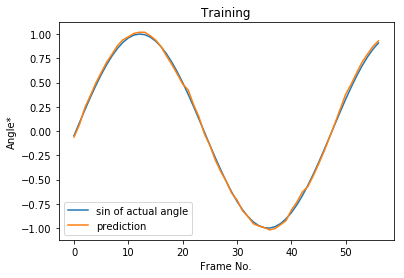

In [166]:
plt.plot(y, label='sin of actual angle')
plt.plot(y_pred.detach().numpy(), label='prediction')
plt.xlabel('Frame No.')
plt.ylabel('Angle*')
plt.legend(loc="best")
plt.title("Training")
plt.show()

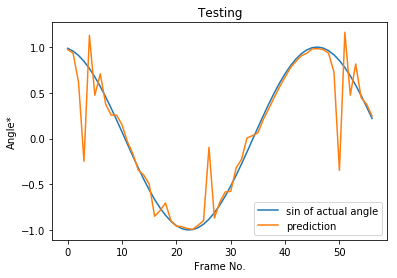

In [167]:
plt.plot(y_train[1], label='sin of actual angle')
plt.plot(model(X_train[1]).detach().numpy(), label='prediction')
plt.xlabel('Frame No.')
plt.ylabel('Angle*')
plt.legend(loc="best")
plt.title("Testing")
plt.show()

## Training using all videos

torch.Size([57])
torch.Size([57, 2])
torch.Size([57])


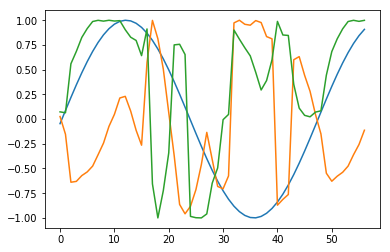

In [168]:
# x = torch.linspace(-math.pi, math.pi, 2000)
x = torch.linspace(-math.pi, math.pi, 57)
# x = torch.linspace(0, 2*math.pi, 60)
# print(x)
# y = torch.sin(x)
# print(y)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
# xx = x.unsqueeze(-1).pow(p)
xx = X_train[0]
print(y.shape)
print(xx.shape)
# print(xx)
plt.plot(y_train[0])
print(y_train[0].shape)
y = y_train[0]
plt.plot(xx)

In [171]:

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 30),
    nn.Tanh(),
    torch.nn.Linear(30, 60),
    nn.Tanh(),
    torch.nn.Linear(60, 30),
    nn.Tanh(),
    torch.nn.Linear(30, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')
# loss_fn = torch.nn.L1Loss()

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

avg_loss = 0
for e in range(1000):
    for i in range(len(X_train)):
        # Get inputs
        y = y_train[i]
        x = X_train[i]

        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(x)

        # Compute and print loss.
        loss = loss_fn(y_pred, y)
        avg_loss += loss.item()
        if i % 100 == 99:
            print(f"iter {i}; loss {loss.item()}, avg loss {avg_loss}")
            avg_loss = 0

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()

iter 99; loss 4.66483211517334, avg loss 1490.1571078300476
iter 99; loss 3.451396942138672, avg loss 536.583518743515
iter 99; loss 3.0404746532440186, avg loss 445.28667545318604
iter 99; loss 2.7536890506744385, avg loss 406.08826518058777
iter 99; loss 2.5083694458007812, avg loss 377.9278131723404
iter 99; loss 2.2673962116241455, avg loss 350.5384088754654
iter 99; loss 2.0067033767700195, avg loss 320.84814155101776
iter 99; loss 1.7108056545257568, avg loss 287.09879171848297
iter 99; loss 1.3530268669128418, avg loss 246.99767112731934
iter 99; loss 1.044616937637329, avg loss 203.98727053403854
iter 99; loss 0.8206844925880432, avg loss 170.36067193746567
iter 99; loss 0.6721736192703247, avg loss 148.1606747508049
iter 99; loss 0.5783357620239258, avg loss 133.50026094913483
iter 99; loss 0.5219953656196594, avg loss 123.24699264764786
iter 99; loss 0.4892234206199646, avg loss 115.43767407536507
iter 99; loss 0.4690978527069092, avg loss 109.181725025177
iter 99; loss 0.455

iter 99; loss 0.010909177362918854, avg loss 4.99704245198518
iter 99; loss 0.010683327913284302, avg loss 4.947625290835276
iter 99; loss 0.010148457251489162, avg loss 4.898035784019157
iter 99; loss 0.009456271305680275, avg loss 4.848682021955028
iter 99; loss 0.00886298157274723, avg loss 4.799197087064385
iter 99; loss 0.008719855919480324, avg loss 4.747715529520065
iter 99; loss 0.011170243844389915, avg loss 4.695402949582785
iter 99; loss 0.019093740731477737, avg loss 4.669171778019518
iter 99; loss 0.02411591447889805, avg loss 4.655073463916779
iter 99; loss 0.01965906098484993, avg loss 4.622803447768092
iter 99; loss 0.016566608101129532, avg loss 4.581577495206147
iter 99; loss 0.015481126494705677, avg loss 4.548336623236537
iter 99; loss 0.01528102159500122, avg loss 4.5108355595730245
iter 99; loss 0.015609560534358025, avg loss 4.479404948651791
iter 99; loss 0.016150586307048798, avg loss 4.451607141643763
iter 99; loss 0.016670910641551018, avg loss 4.424482471775

iter 99; loss 0.006779655814170837, avg loss 2.763292681891471
iter 99; loss 0.0067650624550879, avg loss 2.750798176974058
iter 99; loss 0.00675302604213357, avg loss 2.747417143546045
iter 99; loss 0.006810431368649006, avg loss 2.7348456694744527
iter 99; loss 0.006788081955164671, avg loss 2.730047739110887
iter 99; loss 0.006928914226591587, avg loss 2.7215869650244713
iter 99; loss 0.0069740330800414085, avg loss 2.721004208084196
iter 99; loss 0.007022902835160494, avg loss 2.7032314627431333
iter 99; loss 0.007096712943166494, avg loss 2.6968598319217563
iter 99; loss 0.007001684047281742, avg loss 2.694717414211482
iter 99; loss 0.007082263007760048, avg loss 2.685223977547139
iter 99; loss 0.007140006870031357, avg loss 2.6771538369357586
iter 99; loss 0.007202110253274441, avg loss 2.6706502526067197
iter 99; loss 0.007238758262246847, avg loss 2.664416579529643
iter 99; loss 0.007303345948457718, avg loss 2.6565999602898955
iter 99; loss 0.007352663669735193, avg loss 2.649

iter 99; loss 0.008382979780435562, avg loss 1.9457912179641426
iter 99; loss 0.009403910487890244, avg loss 2.194042099174112
iter 99; loss 0.007970787584781647, avg loss 1.9412049045786262
iter 99; loss 0.009051565080881119, avg loss 2.173296178225428
iter 99; loss 0.007817541249096394, avg loss 1.939959176350385
iter 99; loss 0.008669138886034489, avg loss 2.1449312600307167
iter 99; loss 0.00764043303206563, avg loss 1.9386656014248729
iter 99; loss 0.008351084776222706, avg loss 2.1176529699005187
iter 99; loss 0.007409269921481609, avg loss 1.9316715919412673
iter 99; loss 0.008143401704728603, avg loss 2.099019800312817
iter 99; loss 0.007134995423257351, avg loss 1.9190007597208023
iter 99; loss 0.007995116524398327, avg loss 2.0872048176825047
iter 99; loss 0.00684762466698885, avg loss 1.9038898646831512
iter 99; loss 0.00788821280002594, avg loss 2.078539248323068
iter 99; loss 0.006590290926396847, avg loss 1.8898269501514733
iter 99; loss 0.0078092957846820354, avg loss 2.

iter 99; loss 0.019867096096277237, avg loss 1.6224610549397767
iter 99; loss 0.006584038492292166, avg loss 1.5035040038637817
iter 99; loss 0.021532127633690834, avg loss 1.677516202442348
iter 99; loss 0.010792151093482971, avg loss 1.4445065848995
iter 99; loss 0.005735610146075487, avg loss 1.6028294200077653
iter 99; loss 0.007082894444465637, avg loss 1.5541500900872052
iter 99; loss 0.0064704688265919685, avg loss 1.6035095024853945
iter 99; loss 0.004788769409060478, avg loss 1.5746633822564036
iter 99; loss 0.024534065276384354, avg loss 1.6689648369792849
iter 99; loss 0.00609398540109396, avg loss 1.5097850537858903
iter 99; loss 0.00520084984600544, avg loss 1.4583086087368429
iter 99; loss 0.017942439764738083, avg loss 1.7226603389717638
iter 99; loss 0.0054172188974916935, avg loss 1.4292363866697997
iter 99; loss 0.003568796906620264, avg loss 1.6374316816218197
iter 99; loss 0.004637968260794878, avg loss 1.4785120552405715
iter 99; loss 0.0090146753937006, avg loss 1

iter 99; loss 0.006646593101322651, avg loss 1.392094881623052
iter 99; loss 0.00537841534242034, avg loss 1.289466711692512
iter 99; loss 0.0046535395085811615, avg loss 1.355030451901257
iter 99; loss 0.006517745554447174, avg loss 1.3886627487372607
iter 99; loss 0.004940810147672892, avg loss 1.3313050363212824
iter 99; loss 0.006691217888146639, avg loss 1.3894664517138153
iter 99; loss 0.006761365570127964, avg loss 1.36085025803186
iter 99; loss 0.007265121676027775, avg loss 1.3592800847254694
iter 99; loss 0.006998785305768251, avg loss 1.3505580120254308
iter 99; loss 0.0069928658194839954, avg loss 1.3514989994000643
iter 99; loss 0.006429067812860012, avg loss 1.3361835067626089
iter 99; loss 0.006604671478271484, avg loss 1.3559069123584777
iter 99; loss 0.006055818405002356, avg loss 1.3293219653423876
iter 99; loss 0.006148628890514374, avg loss 1.3513541601132601
iter 99; loss 0.006097692996263504, avg loss 1.3437336278147995
iter 99; loss 0.005444614216685295, avg loss

KeyboardInterrupt: 

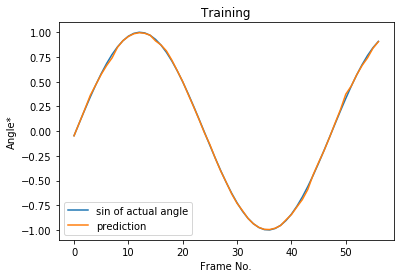

Training Loss: 0.007390506565570831


In [178]:
plt.plot(y_train[0], label='sin of actual angle')
y_pred = model(X_train[0])
plt.plot(y_pred.detach().numpy(), label='prediction')
plt.xlabel('Frame No.')
plt.ylabel('Angle*')
plt.legend(loc="best")
plt.title("Training")
plt.show()
print("Training Loss:", loss_fn(y_pred, y_train[0]).item())

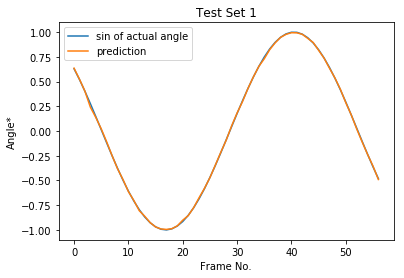

Test Loss 1: 0.0033008551690727472


In [179]:
plt.plot(y_test[0], label='sin of actual angle')
y_pred = model(X_test[0])
plt.plot(y_pred.detach().numpy(), label='prediction')
plt.xlabel('Frame No.')
plt.ylabel('Angle*')
plt.legend(loc="best")
plt.title("Test Set 1")
plt.show()
print("Test Loss 1:", loss_fn(y_pred, y_test[0]).item())

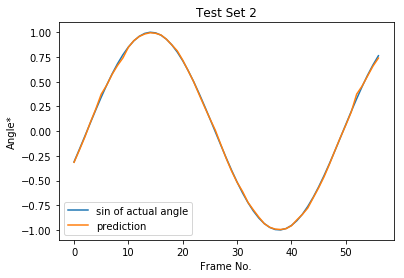

Test Loss 2: 0.007574228569865227


In [180]:
plt.plot(y_test[1], label='sin of actual angle')
y_pred = model(X_test[1])
plt.plot(y_pred.detach().numpy(), label='prediction')
plt.xlabel('Frame No.')
plt.ylabel('Angle*')
plt.legend(loc="best")
plt.title("Test Set 2")
plt.show()
print("Test Loss 2:", loss_fn(y_pred, y_test[1]).item())

## Not Working Models

In [97]:
import torch
import math


# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

for epoch in range(1000):
    
    for i in range(len(X_train)):
      # Get inputs
        x = X_train[i]
#         y_pred = y_train[i].view(57,-1)
        y = y_train[i]
        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(x)

        # Compute and print loss.
        loss = loss_fn(y_pred, y)
        if i % 100 == 99:
            print(f"epoch {epoch}; iter {i}; loss {loss.item()}")

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} var1 + {linear_layer.weight[:, 1].item()} var2')

epoch 0; iter 99; loss 30.913440704345703
epoch 1; iter 99; loss 29.133665084838867
epoch 2; iter 99; loss 28.217041015625
epoch 3; iter 99; loss 27.734615325927734
epoch 4; iter 99; loss 27.492202758789062
epoch 5; iter 99; loss 27.38090705871582
epoch 6; iter 99; loss 27.3315486907959
epoch 7; iter 99; loss 27.306316375732422
epoch 8; iter 99; loss 27.291065216064453
epoch 9; iter 99; loss 27.281509399414062
epoch 10; iter 99; loss 27.275699615478516
epoch 11; iter 99; loss 27.272279739379883
epoch 12; iter 99; loss 27.270301818847656
epoch 13; iter 99; loss 27.269163131713867
epoch 14; iter 99; loss 27.268516540527344
epoch 15; iter 99; loss 27.268146514892578
epoch 16; iter 99; loss 27.26793098449707
epoch 17; iter 99; loss 27.267807006835938
epoch 18; iter 99; loss 27.26774024963379
epoch 19; iter 99; loss 27.267698287963867
epoch 20; iter 99; loss 27.26767921447754
epoch 21; iter 99; loss 27.267663955688477
epoch 22; iter 99; loss 27.267654418945312
epoch 23; iter 99; loss 27.267

epoch 194; iter 99; loss 27.267642974853516
epoch 195; iter 99; loss 27.267642974853516
epoch 196; iter 99; loss 27.267642974853516
epoch 197; iter 99; loss 27.267642974853516
epoch 198; iter 99; loss 27.267642974853516
epoch 199; iter 99; loss 27.267642974853516
epoch 200; iter 99; loss 27.267642974853516
epoch 201; iter 99; loss 27.267642974853516
epoch 202; iter 99; loss 27.267642974853516
epoch 203; iter 99; loss 27.267642974853516
epoch 204; iter 99; loss 27.267642974853516
epoch 205; iter 99; loss 27.267642974853516
epoch 206; iter 99; loss 27.267642974853516
epoch 207; iter 99; loss 27.267642974853516
epoch 208; iter 99; loss 27.267642974853516
epoch 209; iter 99; loss 27.267642974853516
epoch 210; iter 99; loss 27.267642974853516
epoch 211; iter 99; loss 27.267642974853516
epoch 212; iter 99; loss 27.267642974853516
epoch 213; iter 99; loss 27.267642974853516
epoch 214; iter 99; loss 27.267642974853516
epoch 215; iter 99; loss 27.267642974853516
epoch 216; iter 99; loss 27.2676

epoch 386; iter 99; loss 27.267642974853516
epoch 387; iter 99; loss 27.267642974853516
epoch 388; iter 99; loss 27.267642974853516
epoch 389; iter 99; loss 27.267642974853516
epoch 390; iter 99; loss 27.267642974853516
epoch 391; iter 99; loss 27.267642974853516
epoch 392; iter 99; loss 27.267642974853516
epoch 393; iter 99; loss 27.267642974853516
epoch 394; iter 99; loss 27.267642974853516
epoch 395; iter 99; loss 27.267642974853516
epoch 396; iter 99; loss 27.267642974853516
epoch 397; iter 99; loss 27.267642974853516
epoch 398; iter 99; loss 27.267642974853516
epoch 399; iter 99; loss 27.267642974853516
epoch 400; iter 99; loss 27.267642974853516
epoch 401; iter 99; loss 27.267642974853516
epoch 402; iter 99; loss 27.267642974853516
epoch 403; iter 99; loss 27.267642974853516
epoch 404; iter 99; loss 27.267642974853516
epoch 405; iter 99; loss 27.267642974853516
epoch 406; iter 99; loss 27.267642974853516
epoch 407; iter 99; loss 27.267642974853516
epoch 408; iter 99; loss 27.2676

epoch 575; iter 99; loss 27.267642974853516
epoch 576; iter 99; loss 27.267642974853516
epoch 577; iter 99; loss 27.267642974853516
epoch 578; iter 99; loss 27.267642974853516
epoch 579; iter 99; loss 27.267642974853516
epoch 580; iter 99; loss 27.267642974853516
epoch 581; iter 99; loss 27.267642974853516
epoch 582; iter 99; loss 27.267642974853516
epoch 583; iter 99; loss 27.267642974853516
epoch 584; iter 99; loss 27.267642974853516
epoch 585; iter 99; loss 27.267642974853516
epoch 586; iter 99; loss 27.267642974853516
epoch 587; iter 99; loss 27.267642974853516
epoch 588; iter 99; loss 27.267642974853516
epoch 589; iter 99; loss 27.267642974853516
epoch 590; iter 99; loss 27.267642974853516
epoch 591; iter 99; loss 27.267642974853516
epoch 592; iter 99; loss 27.267642974853516
epoch 593; iter 99; loss 27.267642974853516
epoch 594; iter 99; loss 27.267642974853516
epoch 595; iter 99; loss 27.267642974853516
epoch 596; iter 99; loss 27.267642974853516
epoch 597; iter 99; loss 27.2676

epoch 762; iter 99; loss 27.267642974853516
epoch 763; iter 99; loss 27.267642974853516
epoch 764; iter 99; loss 27.267642974853516
epoch 765; iter 99; loss 27.267642974853516
epoch 766; iter 99; loss 27.267642974853516
epoch 767; iter 99; loss 27.267642974853516
epoch 768; iter 99; loss 27.267642974853516
epoch 769; iter 99; loss 27.267642974853516
epoch 770; iter 99; loss 27.267642974853516
epoch 771; iter 99; loss 27.267642974853516
epoch 772; iter 99; loss 27.267642974853516
epoch 773; iter 99; loss 27.267642974853516
epoch 774; iter 99; loss 27.267642974853516
epoch 775; iter 99; loss 27.267642974853516
epoch 776; iter 99; loss 27.267642974853516
epoch 777; iter 99; loss 27.267642974853516
epoch 778; iter 99; loss 27.267642974853516
epoch 779; iter 99; loss 27.267642974853516
epoch 780; iter 99; loss 27.267642974853516
epoch 781; iter 99; loss 27.267642974853516
epoch 782; iter 99; loss 27.267642974853516
epoch 783; iter 99; loss 27.267642974853516
epoch 784; iter 99; loss 27.2676

epoch 953; iter 99; loss 27.267642974853516
epoch 954; iter 99; loss 27.267642974853516
epoch 955; iter 99; loss 27.267642974853516
epoch 956; iter 99; loss 27.267642974853516
epoch 957; iter 99; loss 27.267642974853516
epoch 958; iter 99; loss 27.267642974853516
epoch 959; iter 99; loss 27.267642974853516
epoch 960; iter 99; loss 27.267642974853516
epoch 961; iter 99; loss 27.267642974853516
epoch 962; iter 99; loss 27.267642974853516
epoch 963; iter 99; loss 27.267642974853516
epoch 964; iter 99; loss 27.267642974853516
epoch 965; iter 99; loss 27.267642974853516
epoch 966; iter 99; loss 27.267642974853516
epoch 967; iter 99; loss 27.267642974853516
epoch 968; iter 99; loss 27.267642974853516
epoch 969; iter 99; loss 27.267642974853516
epoch 970; iter 99; loss 27.267642974853516
epoch 971; iter 99; loss 27.267642974853516
epoch 972; iter 99; loss 27.267642974853516
epoch 973; iter 99; loss 27.267642974853516
epoch 974; iter 99; loss 27.267642974853516
epoch 975; iter 99; loss 27.2676

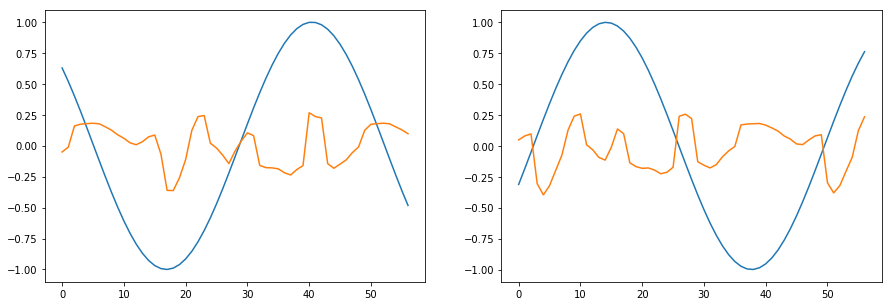

In [98]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(15, 5))
  
axis[0].plot(y_test[0], label="sin()")
out1 = model(X_train[0]).detach().numpy()
# axis[0, 0].plot(X[0][:,0], label="var1")
# axis[0, 0].plot(X[0][:,1], label="var2")
axis[0].plot(out1, label="var1 + var2")
# axis[0].set_title(f"Dataset No. {train_ids[0]}")
out2 = model(X_train[1]).detach().numpy()
axis[1].plot(y_test[1], label="sin()")
# axis[0, 1].plot(X[1][:,0], label="var1")
# axis[0, 1].plot(X[1][:,1], label="var2")
axis[1].plot(out2, label="var1 + var2")
# axis[0].set_title(f"Dataset No. {train_ids[1]}")
  
# Combine all the operations and display
plt.show()

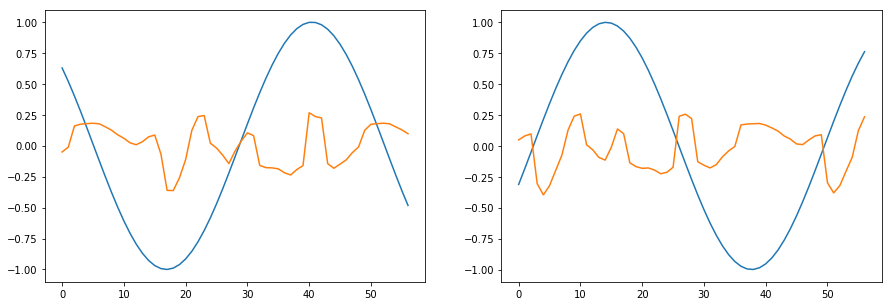

In [96]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=(15, 5))
  
axis[0].plot(y_test[0], label="sin()")
out1 = model(X_train[0]).detach().numpy()
# axis[0, 0].plot(X[0][:,0], label="var1")
# axis[0, 0].plot(X[0][:,1], label="var2")
axis[0].plot(out1, label="var1 + var2")
# axis[0].set_title(f"Dataset No. {train_ids[0]}")
out2 = model(X_train[1]).detach().numpy()
axis[1].plot(y_test[1], label="sin()")
# axis[0, 1].plot(X[1][:,0], label="var1")
# axis[0, 1].plot(X[1][:,1], label="var2")
axis[1].plot(out2, label="var1 + var2")
# axis[0].set_title(f"Dataset No. {train_ids[1]}")
  
# Combine all the operations and display
plt.show()

## 11/15 Efforts

In [9]:
class MLP_large(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)

class MLP_medium(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)

class MLP_small(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)

class Net1(nn.Module):
    '''
    Multilayer Perceptron.
    '''
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)

## SIN() function Approximation

In [52]:
# sin(pi*x)
def func1(x):
    return np.sin(x)

# sin(pi*x)
def func2(x):
    return np.sin(math.pi * x)

def func3(x):
    return 0.5*np.sin(0.5x)**2 * 3*np.cos(x)**3

SyntaxError: invalid syntax (<ipython-input-52-29ca7975d12a>, line 10)

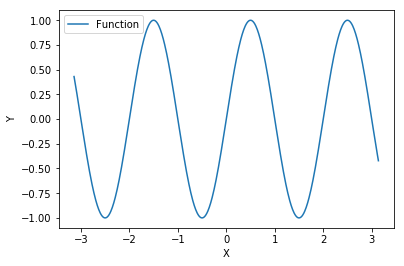

In [55]:
#Create dataset
data = torch.arange(-math.pi, math.pi, 0.01).unsqueeze(1) #Make data 200x1 instead of 200
target = func1(data)
# target = func2(data)
# target = func3(data)

#Plot dataset
plt.plot(data, target, label="Function")
# plt.plot(data, output.detach().numpy(), label="Prediction")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best")
plt.show()

In [56]:
#Hyperparames
learn_rate = 0.01

model = Net1()
# optimizer = torch.optim.Adam(mlp.parameters(), lr=learn_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)
loss_function = nn.L1Loss()



#Track average training loss
avg_loss = 0.0

#Training step
model.train() #Put model into training mode
for i in range(10000):
    if i % 1000 == 0:
        print(f"Iter: {i}")
    
    #Zero the gradients
    optimizer.zero_grad()
    
    #Forward pass and get loss
    output = model(data)
    loss = loss_function(output, target)
#     loss = nn.MSELoss()
    
    #Back propagation to compute gradients, optimizer step() to update weights
    loss.backward()
    optimizer.step()
    
    avg_loss += loss.item()
    #Print average loss
    if i % 1000 == 0:
        print(f"Avg Loss: {avg_loss}")
        avg_loss = 0

Iter: 0
Avg Loss: 0.6798236966133118
Iter: 1000
Avg Loss: 567.7276962399483
Iter: 2000
Avg Loss: 510.1350169181824
Iter: 3000
Avg Loss: 444.1916088461876
Iter: 4000
Avg Loss: 366.9856156408787
Iter: 5000
Avg Loss: 296.8468554019928
Iter: 6000
Avg Loss: 256.29036048054695
Iter: 7000
Avg Loss: 248.2015231847763
Iter: 8000
Avg Loss: 250.43738588690758
Iter: 9000
Avg Loss: 247.00706100463867


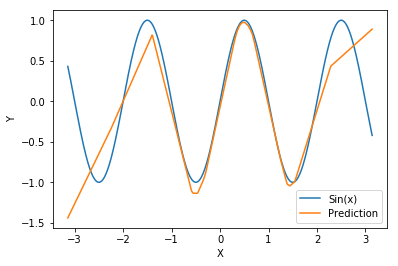

In [57]:
plt.plot(data, target, label="Function")
plt.plot(data, output.detach().numpy(), label="Prediction")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best")
plt.show()

## MAIN NETWORK: ANGLE PREDICTION

In [48]:
# TRAINING

# HYPERPARAMETERS
epochs = 500
learn_rate = 0.001

# Set fixed random number seed
torch.manual_seed(42)

# Initialize the MLP
mlp_small = MLP_small()
mlp_medium = MLP_medium()
mlp_large = MLP_large()

models = [mlp_small, mlp_medium, mlp_large]
epoch_schedule = [10, 100, 500]

# Define the loss function and optimizer
loss_function = nn.MSELoss()
# loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=learn_rate)
# optimizer = torch.optim.SGD(mlp.parameters(), lr=learn_rate)

# Run the training loop
for epoch in range(0, epochs):

    # Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i in range(len(X_train)):

      # Get inputs
#       inputs, targets = data
        inputs = X_train[i]
        targets = y_train[i].view(57,-1)
        
        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = mlp(inputs)
        
#         print("inputs:", inputs.shape)
#         print('targets:', targets.shape)
#         print("outputs:", outputs.shape)
        
        # Compute loss
        loss = loss_function(outputs, targets)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Print statistics
        current_loss += loss.item()
        if i % 10 == 9:
            print('Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 10))
            current_loss = 0.0
        

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch    10: 57.424
Loss after mini-batch    20: 47.408
Loss after mini-batch    30: 43.331
Loss after mini-batch    40: 32.601
Loss after mini-batch    50: 50.308
Loss after mini-batch    60: 39.202
Loss after mini-batch    70: 47.884
Loss after mini-batch    80: 35.038
Loss after mini-batch    90: 30.135
Loss after mini-batch   100: 32.282
Starting epoch 2
Loss after mini-batch    10: 27.676
Loss after mini-batch    20: 21.387
Loss after mini-batch    30: 18.454
Loss after mini-batch    40: 12.629
Loss after mini-batch    50: 22.363
Loss after mini-batch    60: 16.346
Loss after mini-batch    70: 20.748
Loss after mini-batch    80: 14.482
Loss after mini-batch    90: 12.238
Loss after mini-batch   100: 12.918
Starting epoch 3
Loss after mini-batch    10: 11.746
Loss after mini-batch    20: 9.719
Loss after mini-batch    30: 8.122
Loss after mini-batch    40: 6.933
Loss after mini-batch    50: 10.721
Loss after mini-batch    60: 8.594
Loss after mini-b

Loss after mini-batch    40: 7.439
Loss after mini-batch    50: 8.167
Loss after mini-batch    60: 7.029
Loss after mini-batch    70: 8.287
Loss after mini-batch    80: 8.350
Loss after mini-batch    90: 7.740
Loss after mini-batch   100: 7.200
Starting epoch 24
Loss after mini-batch    10: 8.140
Loss after mini-batch    20: 7.741
Loss after mini-batch    30: 6.849
Loss after mini-batch    40: 7.439
Loss after mini-batch    50: 8.167
Loss after mini-batch    60: 7.029
Loss after mini-batch    70: 8.286
Loss after mini-batch    80: 8.350
Loss after mini-batch    90: 7.739
Loss after mini-batch   100: 7.200
Starting epoch 25
Loss after mini-batch    10: 8.140
Loss after mini-batch    20: 7.741
Loss after mini-batch    30: 6.850
Loss after mini-batch    40: 7.439
Loss after mini-batch    50: 8.168
Loss after mini-batch    60: 7.028
Loss after mini-batch    70: 8.286
Loss after mini-batch    80: 8.350
Loss after mini-batch    90: 7.739
Loss after mini-batch   100: 7.199
Starting epoch 26
L

Loss after mini-batch   100: 7.191
Starting epoch 47
Loss after mini-batch    10: 8.139
Loss after mini-batch    20: 7.734
Loss after mini-batch    30: 6.860
Loss after mini-batch    40: 7.441
Loss after mini-batch    50: 8.166
Loss after mini-batch    60: 7.017
Loss after mini-batch    70: 8.277
Loss after mini-batch    80: 8.352
Loss after mini-batch    90: 7.734
Loss after mini-batch   100: 7.191
Starting epoch 48
Loss after mini-batch    10: 8.139
Loss after mini-batch    20: 7.734
Loss after mini-batch    30: 6.861
Loss after mini-batch    40: 7.442
Loss after mini-batch    50: 8.165
Loss after mini-batch    60: 7.017
Loss after mini-batch    70: 8.277
Loss after mini-batch    80: 8.352
Loss after mini-batch    90: 7.734
Loss after mini-batch   100: 7.190
Starting epoch 49
Loss after mini-batch    10: 8.139
Loss after mini-batch    20: 7.733
Loss after mini-batch    30: 6.861
Loss after mini-batch    40: 7.442
Loss after mini-batch    50: 8.165
Loss after mini-batch    60: 7.016
L

Loss after mini-batch    70: 8.271
Loss after mini-batch    80: 8.353
Loss after mini-batch    90: 7.729
Loss after mini-batch   100: 7.185
Starting epoch 71
Loss after mini-batch    10: 8.139
Loss after mini-batch    20: 7.728
Loss after mini-batch    30: 6.869
Loss after mini-batch    40: 7.447
Loss after mini-batch    50: 8.158
Loss after mini-batch    60: 7.009
Loss after mini-batch    70: 8.270
Loss after mini-batch    80: 8.353
Loss after mini-batch    90: 7.729
Loss after mini-batch   100: 7.184
Starting epoch 72
Loss after mini-batch    10: 8.139
Loss after mini-batch    20: 7.728
Loss after mini-batch    30: 6.869
Loss after mini-batch    40: 7.448
Loss after mini-batch    50: 8.157
Loss after mini-batch    60: 7.008
Loss after mini-batch    70: 8.270
Loss after mini-batch    80: 8.353
Loss after mini-batch    90: 7.729
Loss after mini-batch   100: 7.184
Starting epoch 73
Loss after mini-batch    10: 8.139
Loss after mini-batch    20: 7.728
Loss after mini-batch    30: 6.870
L

Loss after mini-batch    70: 8.265
Loss after mini-batch    80: 8.353
Loss after mini-batch    90: 7.725
Loss after mini-batch   100: 7.180
Starting epoch 94
Loss after mini-batch    10: 8.140
Loss after mini-batch    20: 7.724
Loss after mini-batch    30: 6.877
Loss after mini-batch    40: 7.452
Loss after mini-batch    50: 8.151
Loss after mini-batch    60: 7.002
Loss after mini-batch    70: 8.265
Loss after mini-batch    80: 8.353
Loss after mini-batch    90: 7.725
Loss after mini-batch   100: 7.180
Starting epoch 95
Loss after mini-batch    10: 8.140
Loss after mini-batch    20: 7.724
Loss after mini-batch    30: 6.877
Loss after mini-batch    40: 7.453
Loss after mini-batch    50: 8.150
Loss after mini-batch    60: 7.002
Loss after mini-batch    70: 8.264
Loss after mini-batch    80: 8.353
Loss after mini-batch    90: 7.725
Loss after mini-batch   100: 7.180
Starting epoch 96
Loss after mini-batch    10: 8.140
Loss after mini-batch    20: 7.724
Loss after mini-batch    30: 6.878
L

Loss after mini-batch    20: 7.720
Loss after mini-batch    30: 6.885
Loss after mini-batch    40: 7.457
Loss after mini-batch    50: 8.144
Loss after mini-batch    60: 6.996
Loss after mini-batch    70: 8.260
Loss after mini-batch    80: 8.352
Loss after mini-batch    90: 7.722
Loss after mini-batch   100: 7.176
Starting epoch 119
Loss after mini-batch    10: 8.142
Loss after mini-batch    20: 7.720
Loss after mini-batch    30: 6.885
Loss after mini-batch    40: 7.457
Loss after mini-batch    50: 8.144
Loss after mini-batch    60: 6.996
Loss after mini-batch    70: 8.259
Loss after mini-batch    80: 8.352
Loss after mini-batch    90: 7.722
Loss after mini-batch   100: 7.176
Starting epoch 120
Loss after mini-batch    10: 8.142
Loss after mini-batch    20: 7.720
Loss after mini-batch    30: 6.886
Loss after mini-batch    40: 7.457
Loss after mini-batch    50: 8.144
Loss after mini-batch    60: 6.996
Loss after mini-batch    70: 8.259
Loss after mini-batch    80: 8.352
Loss after mini-b

Loss after mini-batch    30: 6.892
Loss after mini-batch    40: 7.461
Loss after mini-batch    50: 8.138
Loss after mini-batch    60: 6.992
Loss after mini-batch    70: 8.255
Loss after mini-batch    80: 8.352
Loss after mini-batch    90: 7.720
Loss after mini-batch   100: 7.173
Starting epoch 143
Loss after mini-batch    10: 8.144
Loss after mini-batch    20: 7.716
Loss after mini-batch    30: 6.893
Loss after mini-batch    40: 7.461
Loss after mini-batch    50: 8.138
Loss after mini-batch    60: 6.992
Loss after mini-batch    70: 8.255
Loss after mini-batch    80: 8.351
Loss after mini-batch    90: 7.720
Loss after mini-batch   100: 7.173
Starting epoch 144
Loss after mini-batch    10: 8.144
Loss after mini-batch    20: 7.716
Loss after mini-batch    30: 6.893
Loss after mini-batch    40: 7.461
Loss after mini-batch    50: 8.138
Loss after mini-batch    60: 6.991
Loss after mini-batch    70: 8.255
Loss after mini-batch    80: 8.351
Loss after mini-batch    90: 7.720
Loss after mini-b

Loss after mini-batch    90: 7.718
Loss after mini-batch   100: 7.171
Starting epoch 167
Loss after mini-batch    10: 8.146
Loss after mini-batch    20: 7.714
Loss after mini-batch    30: 6.899
Loss after mini-batch    40: 7.464
Loss after mini-batch    50: 8.133
Loss after mini-batch    60: 6.988
Loss after mini-batch    70: 8.251
Loss after mini-batch    80: 8.351
Loss after mini-batch    90: 7.718
Loss after mini-batch   100: 7.171
Starting epoch 168
Loss after mini-batch    10: 8.146
Loss after mini-batch    20: 7.713
Loss after mini-batch    30: 6.899
Loss after mini-batch    40: 7.464
Loss after mini-batch    50: 8.133
Loss after mini-batch    60: 6.988
Loss after mini-batch    70: 8.251
Loss after mini-batch    80: 8.351
Loss after mini-batch    90: 7.718
Loss after mini-batch   100: 7.171
Starting epoch 169
Loss after mini-batch    10: 8.146
Loss after mini-batch    20: 7.713
Loss after mini-batch    30: 6.899
Loss after mini-batch    40: 7.465
Loss after mini-batch    50: 8.13

Loss after mini-batch    10: 8.147
Loss after mini-batch    20: 7.711
Loss after mini-batch    30: 6.904
Loss after mini-batch    40: 7.467
Loss after mini-batch    50: 8.129
Loss after mini-batch    60: 6.985
Loss after mini-batch    70: 8.249
Loss after mini-batch    80: 8.350
Loss after mini-batch    90: 7.717
Loss after mini-batch   100: 7.169
Starting epoch 192
Loss after mini-batch    10: 8.147
Loss after mini-batch    20: 7.711
Loss after mini-batch    30: 6.904
Loss after mini-batch    40: 7.468
Loss after mini-batch    50: 8.128
Loss after mini-batch    60: 6.985
Loss after mini-batch    70: 8.249
Loss after mini-batch    80: 8.350
Loss after mini-batch    90: 7.717
Loss after mini-batch   100: 7.169
Starting epoch 193
Loss after mini-batch    10: 8.147
Loss after mini-batch    20: 7.711
Loss after mini-batch    30: 6.904
Loss after mini-batch    40: 7.468
Loss after mini-batch    50: 8.128
Loss after mini-batch    60: 6.985
Loss after mini-batch    70: 8.248
Loss after mini-b

Loss after mini-batch    50: 8.125
Loss after mini-batch    60: 6.983
Loss after mini-batch    70: 8.247
Loss after mini-batch    80: 8.350
Loss after mini-batch    90: 7.715
Loss after mini-batch   100: 7.168
Starting epoch 216
Loss after mini-batch    10: 8.148
Loss after mini-batch    20: 7.710
Loss after mini-batch    30: 6.907
Loss after mini-batch    40: 7.470
Loss after mini-batch    50: 8.125
Loss after mini-batch    60: 6.983
Loss after mini-batch    70: 8.247
Loss after mini-batch    80: 8.350
Loss after mini-batch    90: 7.715
Loss after mini-batch   100: 7.168
Starting epoch 217
Loss after mini-batch    10: 8.148
Loss after mini-batch    20: 7.710
Loss after mini-batch    30: 6.907
Loss after mini-batch    40: 7.470
Loss after mini-batch    50: 8.124
Loss after mini-batch    60: 6.983
Loss after mini-batch    70: 8.246
Loss after mini-batch    80: 8.350
Loss after mini-batch    90: 7.715
Loss after mini-batch   100: 7.168
Starting epoch 218
Loss after mini-batch    10: 8.14

Loss after mini-batch    30: 6.909
Loss after mini-batch    40: 7.472
Loss after mini-batch    50: 8.121
Loss after mini-batch    60: 6.982
Loss after mini-batch    70: 8.245
Loss after mini-batch    80: 8.349
Loss after mini-batch    90: 7.714
Loss after mini-batch   100: 7.168
Starting epoch 240
Loss after mini-batch    10: 8.148
Loss after mini-batch    20: 7.709
Loss after mini-batch    30: 6.910
Loss after mini-batch    40: 7.473
Loss after mini-batch    50: 8.121
Loss after mini-batch    60: 6.982
Loss after mini-batch    70: 8.245
Loss after mini-batch    80: 8.349
Loss after mini-batch    90: 7.714
Loss after mini-batch   100: 7.168
Starting epoch 241
Loss after mini-batch    10: 8.148
Loss after mini-batch    20: 7.709
Loss after mini-batch    30: 6.910
Loss after mini-batch    40: 7.473
Loss after mini-batch    50: 8.121
Loss after mini-batch    60: 6.982
Loss after mini-batch    70: 8.245
Loss after mini-batch    80: 8.349
Loss after mini-batch    90: 7.713
Loss after mini-b

Loss after mini-batch   100: 7.167
Starting epoch 263
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.709
Loss after mini-batch    30: 6.911
Loss after mini-batch    40: 7.475
Loss after mini-batch    50: 8.118
Loss after mini-batch    60: 6.981
Loss after mini-batch    70: 8.244
Loss after mini-batch    80: 8.349
Loss after mini-batch    90: 7.712
Loss after mini-batch   100: 7.167
Starting epoch 264
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.708
Loss after mini-batch    30: 6.911
Loss after mini-batch    40: 7.475
Loss after mini-batch    50: 8.117
Loss after mini-batch    60: 6.981
Loss after mini-batch    70: 8.244
Loss after mini-batch    80: 8.349
Loss after mini-batch    90: 7.712
Loss after mini-batch   100: 7.167
Starting epoch 265
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.708
Loss after mini-batch    30: 6.911
Loss after mini-batch    40: 7.475
Loss after mini-batch    50: 8.117
Loss after mini-batch    60: 6.98

Loss after mini-batch    90: 7.711
Loss after mini-batch   100: 7.166
Starting epoch 286
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.708
Loss after mini-batch    30: 6.912
Loss after mini-batch    40: 7.477
Loss after mini-batch    50: 8.114
Loss after mini-batch    60: 6.980
Loss after mini-batch    70: 8.243
Loss after mini-batch    80: 8.349
Loss after mini-batch    90: 7.711
Loss after mini-batch   100: 7.166
Starting epoch 287
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.708
Loss after mini-batch    30: 6.912
Loss after mini-batch    40: 7.477
Loss after mini-batch    50: 8.114
Loss after mini-batch    60: 6.980
Loss after mini-batch    70: 8.243
Loss after mini-batch    80: 8.349
Loss after mini-batch    90: 7.711
Loss after mini-batch   100: 7.166
Starting epoch 288
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.708
Loss after mini-batch    30: 6.912
Loss after mini-batch    40: 7.477
Loss after mini-batch    50: 8.11

Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.710
Loss after mini-batch   100: 7.166
Starting epoch 310
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.708
Loss after mini-batch    30: 6.912
Loss after mini-batch    40: 7.479
Loss after mini-batch    50: 8.111
Loss after mini-batch    60: 6.979
Loss after mini-batch    70: 8.242
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.709
Loss after mini-batch   100: 7.166
Starting epoch 311
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.708
Loss after mini-batch    30: 6.912
Loss after mini-batch    40: 7.479
Loss after mini-batch    50: 8.111
Loss after mini-batch    60: 6.979
Loss after mini-batch    70: 8.242
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.709
Loss after mini-batch   100: 7.166
Starting epoch 312
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.708
Loss after mini-batch    30: 6.912
Loss after mini-batch    40: 7.47

Loss after mini-batch    90: 7.708
Loss after mini-batch   100: 7.166
Starting epoch 334
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.707
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.481
Loss after mini-batch    50: 8.108
Loss after mini-batch    60: 6.979
Loss after mini-batch    70: 8.241
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.708
Loss after mini-batch   100: 7.166
Starting epoch 335
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.707
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.481
Loss after mini-batch    50: 8.108
Loss after mini-batch    60: 6.978
Loss after mini-batch    70: 8.241
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.708
Loss after mini-batch   100: 7.166
Starting epoch 336
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.707
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.481
Loss after mini-batch    50: 8.10

Loss after mini-batch    60: 6.978
Loss after mini-batch    70: 8.240
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.707
Loss after mini-batch   100: 7.165
Starting epoch 358
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.707
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.483
Loss after mini-batch    50: 8.105
Loss after mini-batch    60: 6.978
Loss after mini-batch    70: 8.240
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.707
Loss after mini-batch   100: 7.165
Starting epoch 359
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.707
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.483
Loss after mini-batch    50: 8.105
Loss after mini-batch    60: 6.978
Loss after mini-batch    70: 8.240
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.707
Loss after mini-batch   100: 7.165
Starting epoch 360
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.70

Loss after mini-batch    60: 6.977
Loss after mini-batch    70: 8.239
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.705
Loss after mini-batch   100: 7.165
Starting epoch 382
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.706
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.485
Loss after mini-batch    50: 8.101
Loss after mini-batch    60: 6.977
Loss after mini-batch    70: 8.239
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.705
Loss after mini-batch   100: 7.165
Starting epoch 383
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.706
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.485
Loss after mini-batch    50: 8.101
Loss after mini-batch    60: 6.977
Loss after mini-batch    70: 8.239
Loss after mini-batch    80: 8.348
Loss after mini-batch    90: 7.705
Loss after mini-batch   100: 7.165
Starting epoch 384
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.70

Loss after mini-batch    60: 6.977
Loss after mini-batch    70: 8.238
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.705
Loss after mini-batch   100: 7.165
Starting epoch 406
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.706
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.486
Loss after mini-batch    50: 8.098
Loss after mini-batch    60: 6.977
Loss after mini-batch    70: 8.238
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.705
Loss after mini-batch   100: 7.165
Starting epoch 407
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.706
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.486
Loss after mini-batch    50: 8.098
Loss after mini-batch    60: 6.976
Loss after mini-batch    70: 8.238
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.704
Loss after mini-batch   100: 7.165
Starting epoch 408
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.70

Starting epoch 428
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.706
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.488
Loss after mini-batch    50: 8.096
Loss after mini-batch    60: 6.976
Loss after mini-batch    70: 8.237
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.704
Loss after mini-batch   100: 7.165
Starting epoch 429
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.706
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.488
Loss after mini-batch    50: 8.096
Loss after mini-batch    60: 6.976
Loss after mini-batch    70: 8.237
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.704
Loss after mini-batch   100: 7.165
Starting epoch 430
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.706
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.488
Loss after mini-batch    50: 8.096
Loss after mini-batch    60: 6.976
Loss after mini-batch    70: 8.23

Loss after mini-batch    50: 8.094
Loss after mini-batch    60: 6.975
Loss after mini-batch    70: 8.236
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.703
Loss after mini-batch   100: 7.165
Starting epoch 451
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.705
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.489
Loss after mini-batch    50: 8.094
Loss after mini-batch    60: 6.975
Loss after mini-batch    70: 8.236
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.703
Loss after mini-batch   100: 7.165
Starting epoch 452
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.705
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.489
Loss after mini-batch    50: 8.094
Loss after mini-batch    60: 6.975
Loss after mini-batch    70: 8.236
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.703
Loss after mini-batch   100: 7.165
Starting epoch 453
Loss after mini-batch    10: 8.14

Loss after mini-batch    60: 6.975
Loss after mini-batch    70: 8.236
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.702
Loss after mini-batch   100: 7.165
Starting epoch 475
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.705
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.490
Loss after mini-batch    50: 8.092
Loss after mini-batch    60: 6.975
Loss after mini-batch    70: 8.236
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.702
Loss after mini-batch   100: 7.165
Starting epoch 476
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.705
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.490
Loss after mini-batch    50: 8.092
Loss after mini-batch    60: 6.975
Loss after mini-batch    70: 8.236
Loss after mini-batch    80: 8.347
Loss after mini-batch    90: 7.702
Loss after mini-batch   100: 7.164
Starting epoch 477
Loss after mini-batch    10: 8.148
Loss after mini-batch    20: 7.70

Loss after mini-batch    90: 7.701
Loss after mini-batch   100: 7.164
Starting epoch 497
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.705
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.492
Loss after mini-batch    50: 8.089
Loss after mini-batch    60: 6.974
Loss after mini-batch    70: 8.235
Loss after mini-batch    80: 8.346
Loss after mini-batch    90: 7.701
Loss after mini-batch   100: 7.164
Starting epoch 498
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.705
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.492
Loss after mini-batch    50: 8.089
Loss after mini-batch    60: 6.974
Loss after mini-batch    70: 8.235
Loss after mini-batch    80: 8.346
Loss after mini-batch    90: 7.701
Loss after mini-batch   100: 7.164
Starting epoch 499
Loss after mini-batch    10: 8.149
Loss after mini-batch    20: 7.705
Loss after mini-batch    30: 6.913
Loss after mini-batch    40: 7.492
Loss after mini-batch    50: 8.08

In [52]:
y_pred = mlp(test_vars).view(57).detach().numpy()
y_true = np.array(angles)
print(y_pred.shape)
print(y_true.shape)

(57,)
(57,)


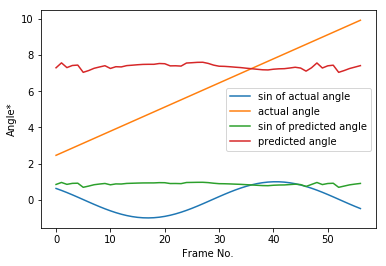

In [53]:
plt.plot(np.sin(y_true), label='sin of actual angle')
plt.plot(y_true, label = 'actual angle')
plt.plot(np.sin(y_pred), label='sin of predicted angle')
plt.plot(y_pred, label='predicted angle')


# plt.plot(var1, label='predicted var 1')
# plt.plot(var2, label='predicted var 2')
# plt.plot(np.sin(var1))
# plt.plot(np.sin(var2))
plt.xlabel('Frame No.')
plt.ylabel('Angle*')
plt.legend(loc="best")
plt.show()

In [36]:
# TESTING
test_vars = X_test[0]
angles = y_test[0]
var1 = test_vars[:, 0]
var2 = test_vars[:, 1]
print(test_vars.shape)
print(angles.shape)
print(var1.shape)
print(var2.shape)

torch.Size([57, 2])
torch.Size([57])
torch.Size([57])
torch.Size([57])


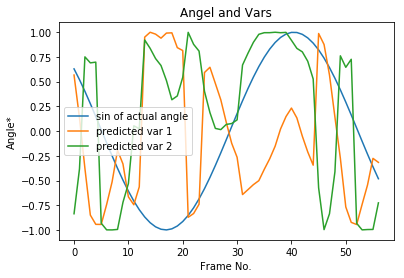

In [37]:
plt.plot(np.sin(angles), label='sin of actual angle')
plt.plot(var1, label='predicted var 1')
plt.plot(var2, label='predicted var 2')
# plt.plot(np.sin(var1))
# plt.plot(np.sin(var2))
plt.xlabel('Frame No.')
plt.ylabel('Angle*')
plt.legend(loc="best")
plt.title("Angel and Vars")
plt.show()

(57,)
(57,)


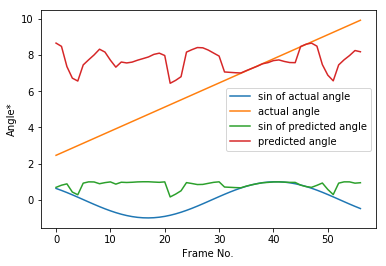

In [ ]:
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
import pytorch_lightning as pl

class MLP(pl.LightningModule):
  
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2, 32),
      nn.Tanh(),
      nn.Linear(32, 1),
    )
    self.loss = nn.MSELoss()
    
  def forward(self, x):
    return self.layers(x)
  
  def training_step(self, batch, batch_idx):
    x, y = batch
    x = x.view(x.size(0), -1)
    y_hat = self.layers(x)
    loss = self.loss(y_hat, y)
    self.log('train_loss', loss)
    return loss
  
  def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), lr=1e-4)
    return optimizer

In [ ]:
from torchvision.datasets import CIFAR10
dataset = CIFAR10(os.getcwd(), download=True, transform=transforms.ToTensor())
print(type(dataset))
#   pl.seed_everything(42)
#   mlp = MLP()
#   trainer = pl.Trainer(auto_scale_batch_size='power', gpus=0, deterministic=True, max_epochs=5)
#   trainer.fit(mlp, DataLoader(dataset))

In [15]:
# we only have predictions / variables for 1/10 of the training datasets
print(6270/57)

110.0


In [16]:
for i, id in enumerate(ids):
    print(i, id)

0 524_0.png
1 524_1.png
2 524_2.png
3 524_3.png
4 524_4.png
5 524_5.png
6 524_6.png
7 524_7.png
8 524_8.png
9 524_9.png
10 524_10.png
11 524_11.png
12 524_12.png
13 524_13.png
14 524_14.png
15 524_15.png
16 524_16.png
17 524_17.png
18 524_18.png
19 524_19.png
20 524_20.png
21 524_21.png
22 524_22.png
23 524_23.png
24 524_24.png
25 524_25.png
26 524_26.png
27 524_27.png
28 524_28.png
29 524_29.png
30 524_30.png
31 524_31.png
32 524_32.png
33 524_33.png
34 524_34.png
35 524_35.png
36 524_36.png
37 524_37.png
38 524_38.png
39 524_39.png
40 524_40.png
41 524_41.png
42 524_42.png
43 524_43.png
44 524_44.png
45 524_45.png
46 524_46.png
47 524_47.png
48 524_48.png
49 524_49.png
50 524_50.png
51 524_51.png
52 524_52.png
53 524_53.png
54 524_54.png
55 524_55.png
56 524_56.png
57 1032_0.png
58 1032_1.png
59 1032_2.png
60 1032_3.png
61 1032_4.png
62 1032_5.png
63 1032_6.png
64 1032_7.png
65 1032_8.png
66 1032_9.png
67 1032_10.png
68 1032_11.png
69 1032_12.png
70 1032_13.png
71 1032_14.png
72 1032

1859 12_35.png
1860 12_36.png
1861 12_37.png
1862 12_38.png
1863 12_39.png
1864 12_40.png
1865 12_41.png
1866 12_42.png
1867 12_43.png
1868 12_44.png
1869 12_45.png
1870 12_46.png
1871 12_47.png
1872 12_48.png
1873 12_49.png
1874 12_50.png
1875 12_51.png
1876 12_52.png
1877 12_53.png
1878 12_54.png
1879 12_55.png
1880 12_56.png
1881 1005_0.png
1882 1005_1.png
1883 1005_2.png
1884 1005_3.png
1885 1005_4.png
1886 1005_5.png
1887 1005_6.png
1888 1005_7.png
1889 1005_8.png
1890 1005_9.png
1891 1005_10.png
1892 1005_11.png
1893 1005_12.png
1894 1005_13.png
1895 1005_14.png
1896 1005_15.png
1897 1005_16.png
1898 1005_17.png
1899 1005_18.png
1900 1005_19.png
1901 1005_20.png
1902 1005_21.png
1903 1005_22.png
1904 1005_23.png
1905 1005_24.png
1906 1005_25.png
1907 1005_26.png
1908 1005_27.png
1909 1005_28.png
1910 1005_29.png
1911 1005_30.png
1912 1005_31.png
1913 1005_32.png
1914 1005_33.png
1915 1005_34.png
1916 1005_35.png
1917 1005_36.png
1918 1005_37.png
1919 1005_38.png
1920 1005_39.png


3803 681_41.png
3804 681_42.png
3805 681_43.png
3806 681_44.png
3807 681_45.png
3808 681_46.png
3809 681_47.png
3810 681_48.png
3811 681_49.png
3812 681_50.png
3813 681_51.png
3814 681_52.png
3815 681_53.png
3816 681_54.png
3817 681_55.png
3818 681_56.png
3819 247_0.png
3820 247_1.png
3821 247_2.png
3822 247_3.png
3823 247_4.png
3824 247_5.png
3825 247_6.png
3826 247_7.png
3827 247_8.png
3828 247_9.png
3829 247_10.png
3830 247_11.png
3831 247_12.png
3832 247_13.png
3833 247_14.png
3834 247_15.png
3835 247_16.png
3836 247_17.png
3837 247_18.png
3838 247_19.png
3839 247_20.png
3840 247_21.png
3841 247_22.png
3842 247_23.png
3843 247_24.png
3844 247_25.png
3845 247_26.png
3846 247_27.png
3847 247_28.png
3848 247_29.png
3849 247_30.png
3850 247_31.png
3851 247_32.png
3852 247_33.png
3853 247_34.png
3854 247_35.png
3855 247_36.png
3856 247_37.png
3857 247_38.png
3858 247_39.png
3859 247_40.png
3860 247_41.png
3861 247_42.png
3862 247_43.png
3863 247_44.png
3864 247_45.png
3865 247_46.png
38

5306 545_5.png
5307 545_6.png
5308 545_7.png
5309 545_8.png
5310 545_9.png
5311 545_10.png
5312 545_11.png
5313 545_12.png
5314 545_13.png
5315 545_14.png
5316 545_15.png
5317 545_16.png
5318 545_17.png
5319 545_18.png
5320 545_19.png
5321 545_20.png
5322 545_21.png
5323 545_22.png
5324 545_23.png
5325 545_24.png
5326 545_25.png
5327 545_26.png
5328 545_27.png
5329 545_28.png
5330 545_29.png
5331 545_30.png
5332 545_31.png
5333 545_32.png
5334 545_33.png
5335 545_34.png
5336 545_35.png
5337 545_36.png
5338 545_37.png
5339 545_38.png
5340 545_39.png
5341 545_40.png
5342 545_41.png
5343 545_42.png
5344 545_43.png
5345 545_44.png
5346 545_45.png
5347 545_46.png
5348 545_47.png
5349 545_48.png
5350 545_49.png
5351 545_50.png
5352 545_51.png
5353 545_52.png
5354 545_53.png
5355 545_54.png
5356 545_55.png
5357 545_56.png
5358 912_0.png
5359 912_1.png
5360 912_2.png
5361 912_3.png
5362 912_4.png
5363 912_5.png
5364 912_6.png
5365 912_7.png
5366 912_8.png
5367 912_9.png
5368 912_10.png
5369 91

In [8]:
df = np.load('./scripts/logs_circular_motion_refine-64_1/prediction_long_term/model_rollout/stability.npy')

In [9]:
print(df.shape)

(110, 29)


In [10]:
print(df)

[[0.42513606 0.12511013 0.0691979  ... 0.14652    0.0741086  0.05749899]
 [0.1488189  0.05255614 0.15649796 ... 0.05777638 0.15448833 0.04506393]
 [0.29985631 0.48760211 0.06594243 ... 0.04212693 0.14640474 0.07417089]
 ...
 [0.78958726 0.25922719 0.06898575 ... 0.14404491 0.07414602 0.05723037]
 [0.00244545 0.06084003 0.15224837 ... 0.15528372 0.07005972 0.05682437]
 [0.42513606 0.12511013 0.0691979  ... 0.14650923 0.0741182  0.05752001]]


In [16]:
min_loss = 1
min_row = 0
for row in range(df.shape[0]):
    print((row, df[row].mean()))
    if df[row][1] < min_loss:
        min_loss = df[row][1]
        min_row = row
print("MIN LOSS:", min_loss)

(0, 0.10505335392623112)
(1, 0.09304515381568465)
(2, 0.1132471827139821)
(3, 0.14390959120194974)
(4, 0.13637843291307317)
(5, 0.20561725055349284)
(6, 0.18488461795114464)
(7, 0.19127198488547884)
(8, 0.1554230622433383)
(9, 0.18371454163871961)
(10, 0.18580425090301012)
(11, 0.09149181823535212)
(12, 0.13556192866687117)
(13, 0.09441721237039771)
(14, 0.1731555826383932)
(15, 0.1000971877626304)
(16, 0.13673823532359353)
(17, 0.15543689899917307)
(18, 0.10918756391339261)
(19, 0.13151740925065403)
(20, 0.25501897523243877)
(21, 0.10748059147615628)
(22, 0.33525788472515755)
(23, 0.16083988182021883)
(24, 0.209204011243479)
(25, 0.17377800982573938)
(26, 0.19308869463616404)
(27, 0.14709117005033226)
(28, 0.1598863582174968)
(29, 0.19082108666670733)
(30, 0.09164333390071988)
(31, 0.13670430473726372)
(32, 0.09222803727306168)
(33, 0.15505133777985286)
(34, 0.09346123502172272)
(35, 0.10676789001144212)
(36, 0.12039040799798637)
(37, 0.2019957271886283)
(38, 0.2025947998566874)
(39, 

In [17]:
df2 = np.load('./scripts/logs_circular_motion_refine-64_1/prediction_long_term/model_rollout/stability.npy')
print(df2)

[[6.62070420e-03 8.07788316e-03 6.82267360e-03 ... 4.10123542e-03
  7.90984277e-03 1.31637296e-02]
 [2.43708715e-02 9.61202569e-03 6.23096433e-03 ... 3.87154178e-05
  3.66344932e-03 2.37392783e-02]
 [5.76618419e-04 3.10558230e-01 6.49203639e-03 ... 6.34848839e-03
  5.98904584e-03 4.40476742e-03]
 ...
 [2.09539030e-02 3.18954291e-04 3.26922489e-03 ... 1.31643396e-02
  1.73229969e-03 1.71233190e-03]
 [1.50859989e-02 2.40099765e-02 1.37103759e-02 ... 5.48589509e-03
  5.31311287e-03 3.55629460e-03]
 [2.91154999e-03 1.11628510e-02 1.35039296e-02 ... 9.02833417e-03
  5.46923792e-03 5.30208042e-03]]


In [18]:
for row in range(df2.shape[0]):
    print((row, df2[row].mean()))

(0, 0.06849647583570412)
(1, 0.026353803897203258)
(2, 0.02989199457505461)
(3, 0.0314520387320703)
(4, 0.0671243054655798)
(5, 0.027034160765369648)
(6, 0.044627829473248656)
(7, 0.0601645556930164)
(8, 0.034953424818954304)
(9, 0.03425379689737195)
(10, 0.03476493299767126)
(11, 0.06015650049906479)
(12, 0.0314538732686899)
(13, 0.07099552394983816)
(14, 0.0369051683787959)
(15, 0.03874724636889055)
(16, 0.040187821220727)
(17, 0.02331854179320889)
(18, 0.03499048736105986)
(19, 0.09587133217879956)
(20, 0.03969853247038153)
(21, 0.03693359646623039)
(22, 0.07841230282190673)
(23, 0.06799566594217422)
(24, 0.034690360794323576)
(25, 0.026201799452949138)
(26, 0.025683638684783766)
(27, 0.03576341167429526)
(28, 0.041002622259525355)
(29, 0.030749218468152886)
(30, 0.07840881128153153)
(31, 0.03693285600456875)
(32, 0.04143507220635064)
(33, 0.03483885072700073)
(34, 0.036906702303957865)
(35, 0.046459633963893104)
(36, 0.08988033314669557)
(37, 0.059013721020352836)
(38, 0.0625127132